In [1]:
# base
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 可視化
import seaborn as sns
import matplotlib.pyplot as plt

# GUI
import tkinter.filedialog

# 分析の戦略

## 地域選択
### 選択基準
日本全国を対象とすべきであるが、**気温上昇の影響を受けやすい地域**に着目して温暖化現象を検証する   
地域選択の軸として下記がある

1. **都市部ヒートアイランド効果により、大都市やその周辺地域では気温がさらに上昇しやすい**  
東京都、大阪府、愛知県（名古屋市周辺）などの大都市圏がこれに該当する可能性が高い
  
2. **内陸部**  
海からの冷たい風の影響を受けにくい内陸部では、気温上昇がより顕著になる可能性がある
新潟県、長野県、岐阜県などの内陸県が該当する可能性がある
  
3. **南西諸島**  
温暖な気候を持つ地域で、気温上昇により熱帯性の気候への変化が起こりやすい
沖縄県や鹿児島県（奄美大島など）がこれに該当する

### 選択結果（岐阜）
1.の観点での地域設定に関しては、分析にあたって過去の都市化の進み具合の要素の組み込み、  
今後の都市化の更なる加速進行具合の組み込みなどが分析にあたって障害をきたすと判断  
  
3.の観点での地域設定に関しては、気候変動要素が大きいと見込んだので分析から除外  

2.の観点、**内陸部** であれば過去、未来ともに安定した分析を行えると判断し、そのうち**岐阜**を選択した。


## 取得データに関して
ご指定のあった下記のサイトからデータ取得  
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

現時点11月の半ばのため、取得するデータの範囲は～2023/10までのデータとした。

![Global-Area](./resource/all-area.png)
![Local-Area](./resource/area.png)
![Item](./resource/items.png)
![During](./resource/During.png)


# 前処理

In [2]:
# Dialogによるファイル選択
target_file = tkinter.filedialog.askopenfilename(filetypes=[("csvファイル", "*.csv")])

In [3]:
print(target_file)

D:/Project/kufu.ai-sama/data/original-modified/original-modified.csv


In [4]:
# データ読み込み
df = pd.read_csv(target_file)

# カラム名変更
df.rename(columns={'年月':'Year-Month','平均気温(℃)':'average-temperature','品質情報':'quality','均質番号':'no'}, inplace=True)

# 品質番号が充填されているものを取得
df = df[df.quality != 0]

# データフレームの情報を表示
# 欠損値の有無チェック
df.info()
# 下記の出力により欠損値はないと判断

<class 'pandas.core.frame.DataFrame'>
Index: 1690 entries, 132 to 1821
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year-Month           1690 non-null   object 
 1   average-temperature  1690 non-null   float64
 2   quality              1690 non-null   int64  
 3   no                   1690 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 66.0+ KB


In [5]:
# データに通し番号を付与
df['seq'] = range(0, len(df))

# 平均気温の可視化（YoY 月単位で）

2000年の1月、2001年の1月、2002年の1月...で平均気温推移をグラフ化  
2000年の2月、2001年の2月、2002年の2月...で平均気温推移をグラフ化  
...  
といった塩梅で、平均気温変化を可視化する

本方式をとった理由は月次推移で可視化してもトレンド可視化出来なかったため

In [6]:
datum = []
for i in range(12):
    tmp = df[df.seq % 12 == i]
    datum.append(tmp)

In [7]:
datum[11]

,Year-Month,average-temperature,quality,no,seq
143,1883/12,3.9,8,1,11
155,1884/12,3.2,8,1,23
167,1885/12,5.7,8,1,35
179,1886/12,4.6,8,1,47
191,1887/12,5.2,8,1,59
...,...,...,...,...,...
1763,2018/12,7.9,8,1,1631
1775,2019/12,8.6,8,1,1643
1787,2020/12,7.2,8,1,1655
1799,2021/12,7.2,8,1,1667


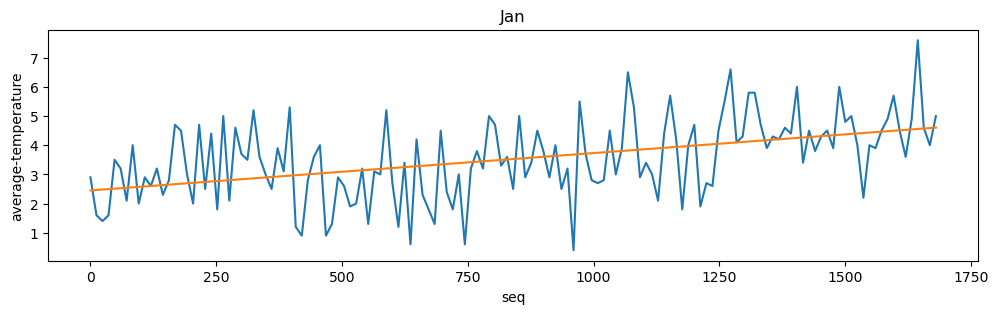

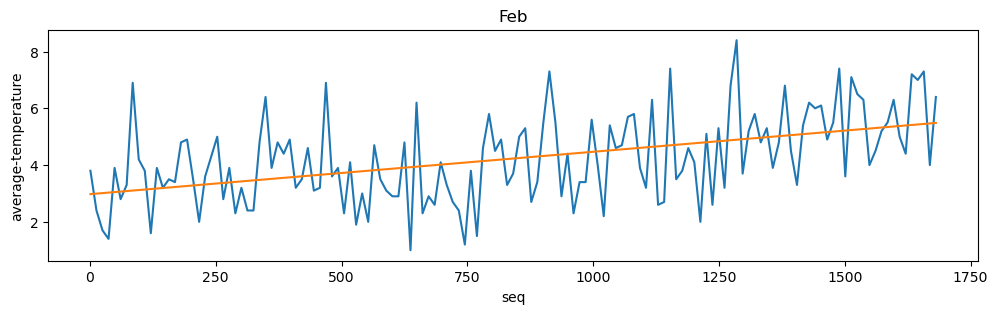

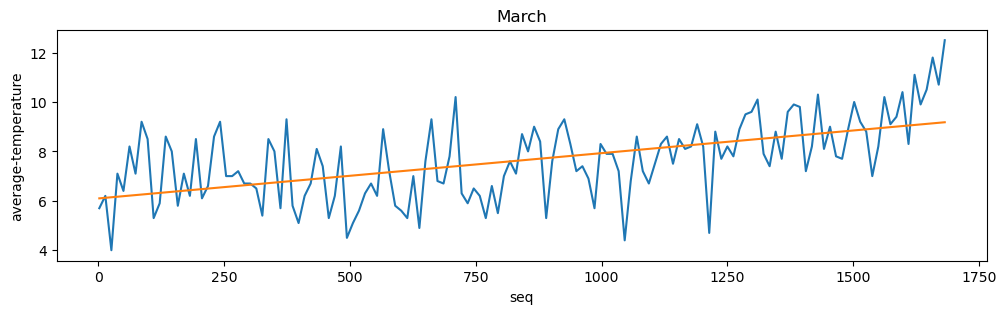

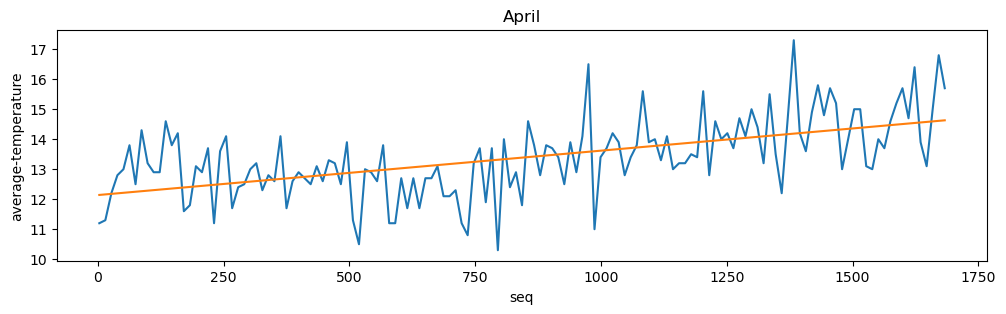

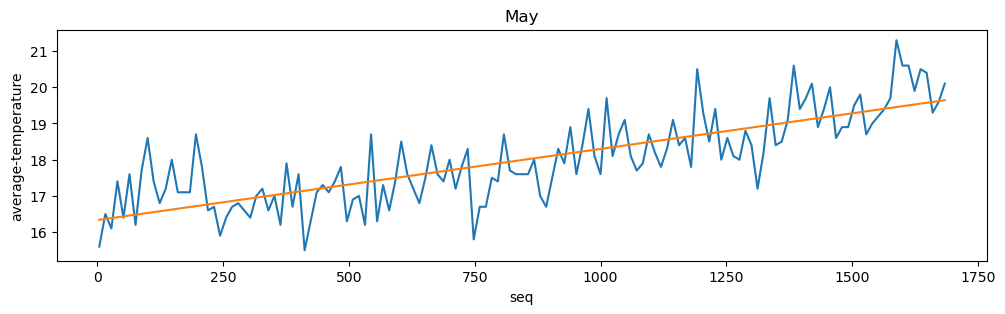

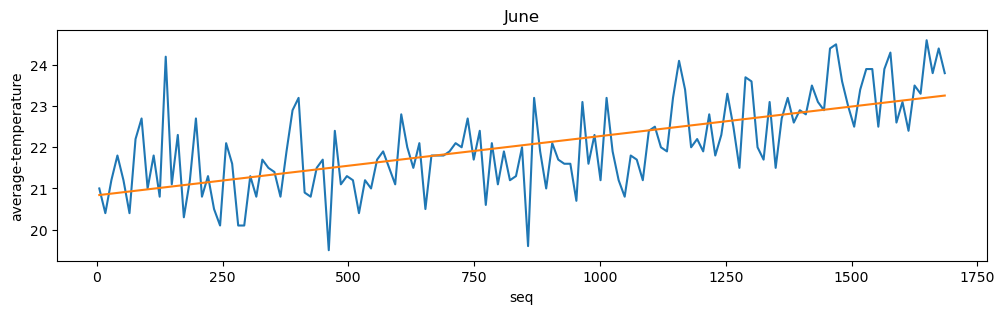

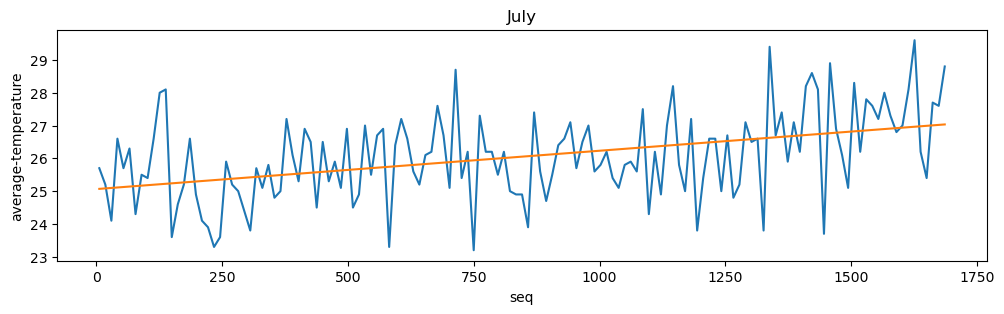

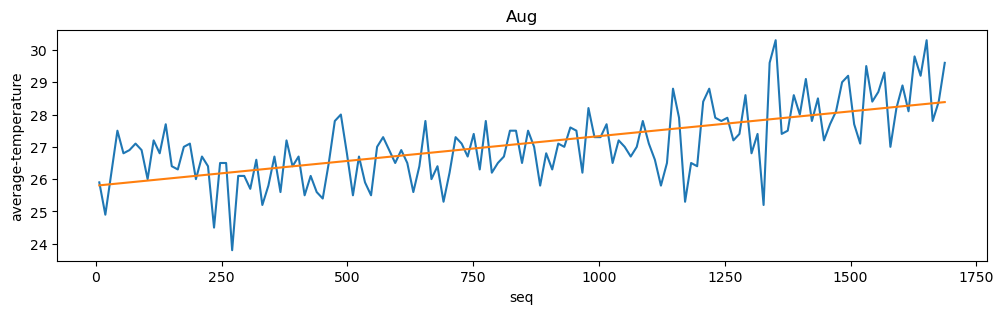

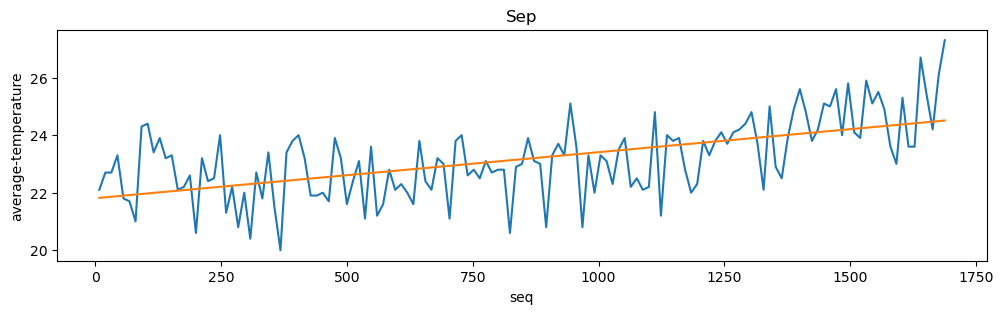

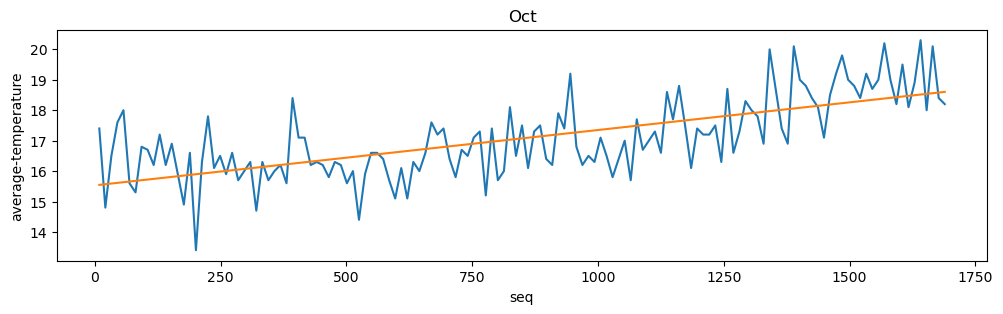

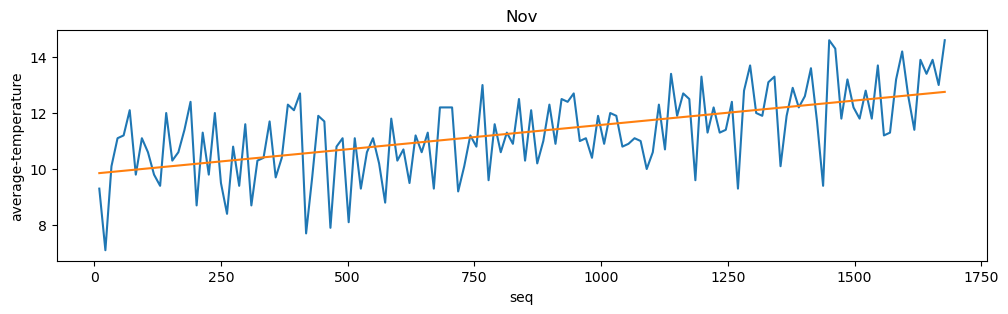

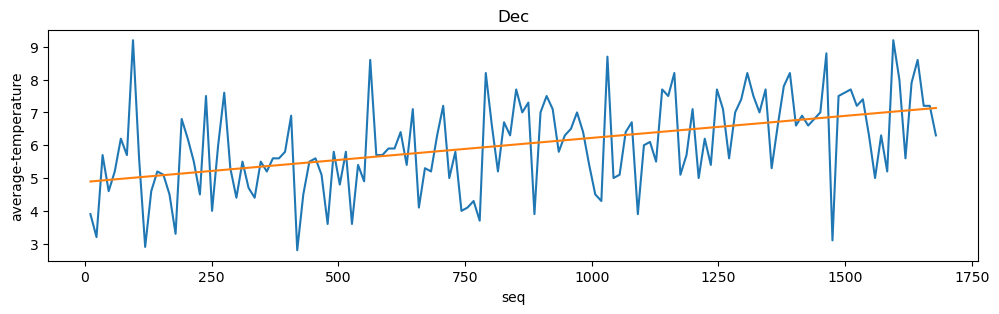

In [8]:
# グラフ調整
plt.rcParams['figure.figsize'] = [12, 3]

months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month, elm in zip(months, datum):
    
    # 平均気温の可視化（YoY 月単位で）
    p = sns.lineplot(x='seq', y='average-temperature', data=elm)
    p.set_title(month)
    
    # 回帰直線の算出
    reg = LinearRegression()
    x = np.array(elm['seq'])
    x_ = x.reshape(-1, 1)
    temperature =np.array(elm['average-temperature'])
    prices_ = temperature.reshape(-1, 1)
    result = reg.fit(x_, prices_)
    a = result.coef_[0][0]
    b = result.intercept_[0]

    # 回帰直線の描画
    y = []
    for xi in x:
        y_ = a * xi + b
        y.append(y_)

    plt.plot(x, y)
    
    plt.show()

# 所見

**岐阜県の平均気温は、上昇傾向にあると思われる**

地球温暖化現象が叫ばれ始めたのが20世紀後半ということで、1990年代からのデータをもって以降の分析を進める

続く時系列データ分析においては、下記のデータに対して分析を進める  
**data/analyze/target.csv**




In [9]:
df

,Year-Month,average-temperature,quality,no,seq
132,1883/1,2.9,8,1,0
133,1883/2,3.8,8,1,1
134,1883/3,5.7,8,1,2
135,1883/4,11.2,5,1,3
136,1883/5,15.6,5,1,4
...,...,...,...,...,...
1817,2023/6,23.8,8,1,1685
1818,2023/7,28.8,8,1,1686
1819,2023/8,29.6,8,1,1687
1820,2023/9,27.3,8,1,1688


In [10]:
# YYYY/MM文字列を datetime型へ変換
df['YM']=pd.to_datetime(df['Year-Month'], format='%Y/%m')

In [11]:
# 1990/1以降のデータを抽出
start_date = pd.to_datetime('1990/1', format='%Y/%m')
result_df = df[df['YM'] >= start_date]

In [12]:
result_df.to_csv("data/analyze/target.csv", index=False)